In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("14-income_evaluation.csv")
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
df.columns = df.columns.str.replace(" ","")

In [6]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [7]:
df.columns = ["age","work_class","final_weight","education","education_num","marital_status","occupation",
                "relationship","race","sex","capital_gain","capital_loss","hours_per_week","native_country",
                "income"]

In [8]:
df.columns

Index(['age', 'work_class', 'final_weight', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [9]:
cat_cols = [col for col in df.columns if df[col].dtype == "O"]
num_cols = [col for col in df.columns if df[col].dtype != "O"]

In [10]:
print(cat_cols, "\n")
print(num_cols)

['work_class', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income'] 

['age', 'final_weight', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [11]:
df[cat_cols[0]].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [12]:
df[cat_cols[0]] = df[cat_cols[0]].str.replace(" ", "")

In [13]:
df[cat_cols[0]].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [14]:
for col in cat_cols:
    print(df[col].value_counts())

work_class
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64
education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64
marital_status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64
occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial     

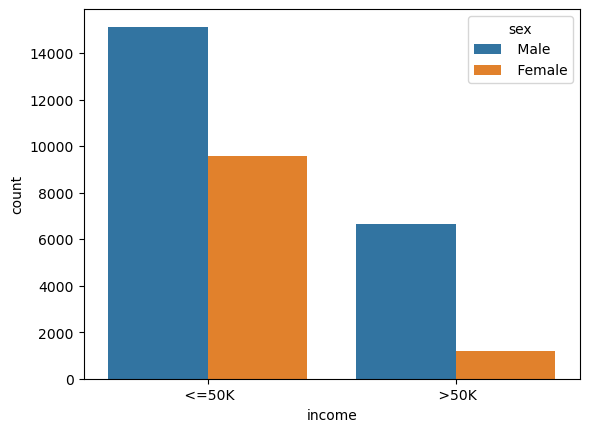

In [15]:
sns.countplot(data=df, x="income", hue="sex")
plt.show()

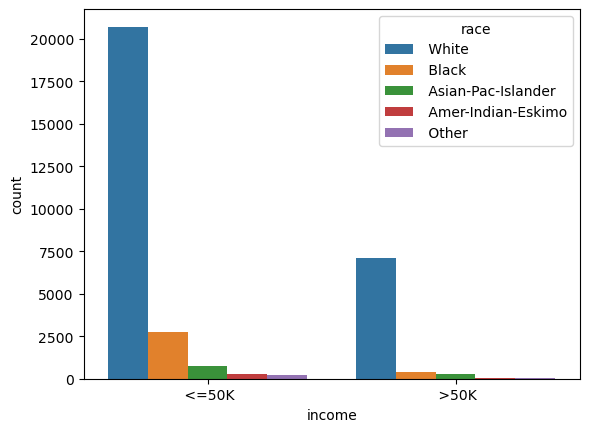

In [16]:
sns.countplot(data=df,x="income",hue="race")
plt.show()

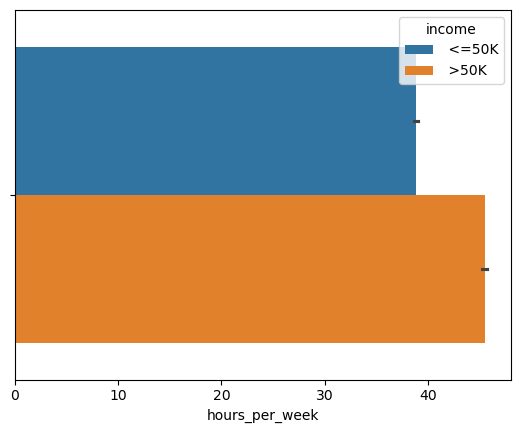

In [17]:
sns.barplot(data=df, x="hours_per_week", hue="income")
plt.show()

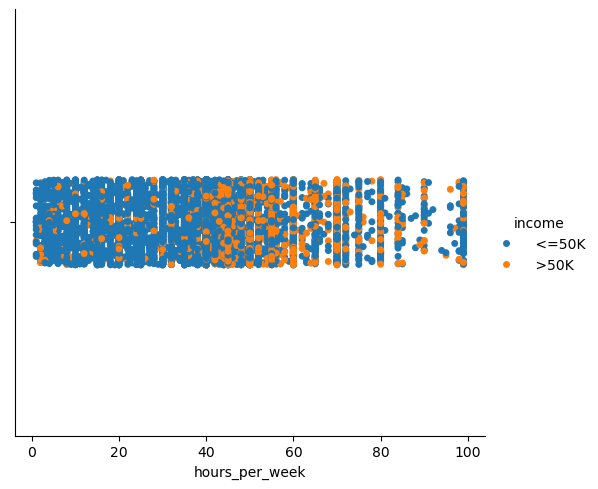

In [18]:
sns.catplot(data=df,x="hours_per_week",hue="income")
plt.show()

In [19]:
cat_cols

['work_class',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

In [20]:
df["work_class"].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [21]:
for col in cat_cols:
    df[col] = df[col].str.replace(" ", "")

In [22]:
for col in cat_cols:
    print(df[col].unique())

['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']
['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']
['Male' 'Female']
['United-States' 'Cuba' 'Jamaica' 'India' '?' 'Mexico' 'South'
 'Puerto-Rico' 'Honduras' 'England' 'Canada' 'Germany' 'Iran'
 'Philippines' 'Italy' 'Poland' 'Columbia' 'Cambodia' 'Thailand' '

In [23]:
for col in cat_cols:
    df[col] = df[col].replace("?",np.nan)

In [24]:
for col in cat_cols:
    print(df[col].unique())

['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' nan
 'Self-emp-inc' 'Without-pay' 'Never-worked']
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' nan
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']
['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']
['Male' 'Female']
['United-States' 'Cuba' 'Jamaica' 'India' nan 'Mexico' 'South'
 'Puerto-Rico' 'Honduras' 'England' 'Canada' 'Germany' 'Iran'
 'Philippines' 'Italy' 'Poland' 'Columbia' 'Cambodia' 'Thailand' '

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   work_class      30725 non-null  object
 2   final_weight    32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [26]:
df.isnull().sum()

age                  0
work_class        1836
final_weight         0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

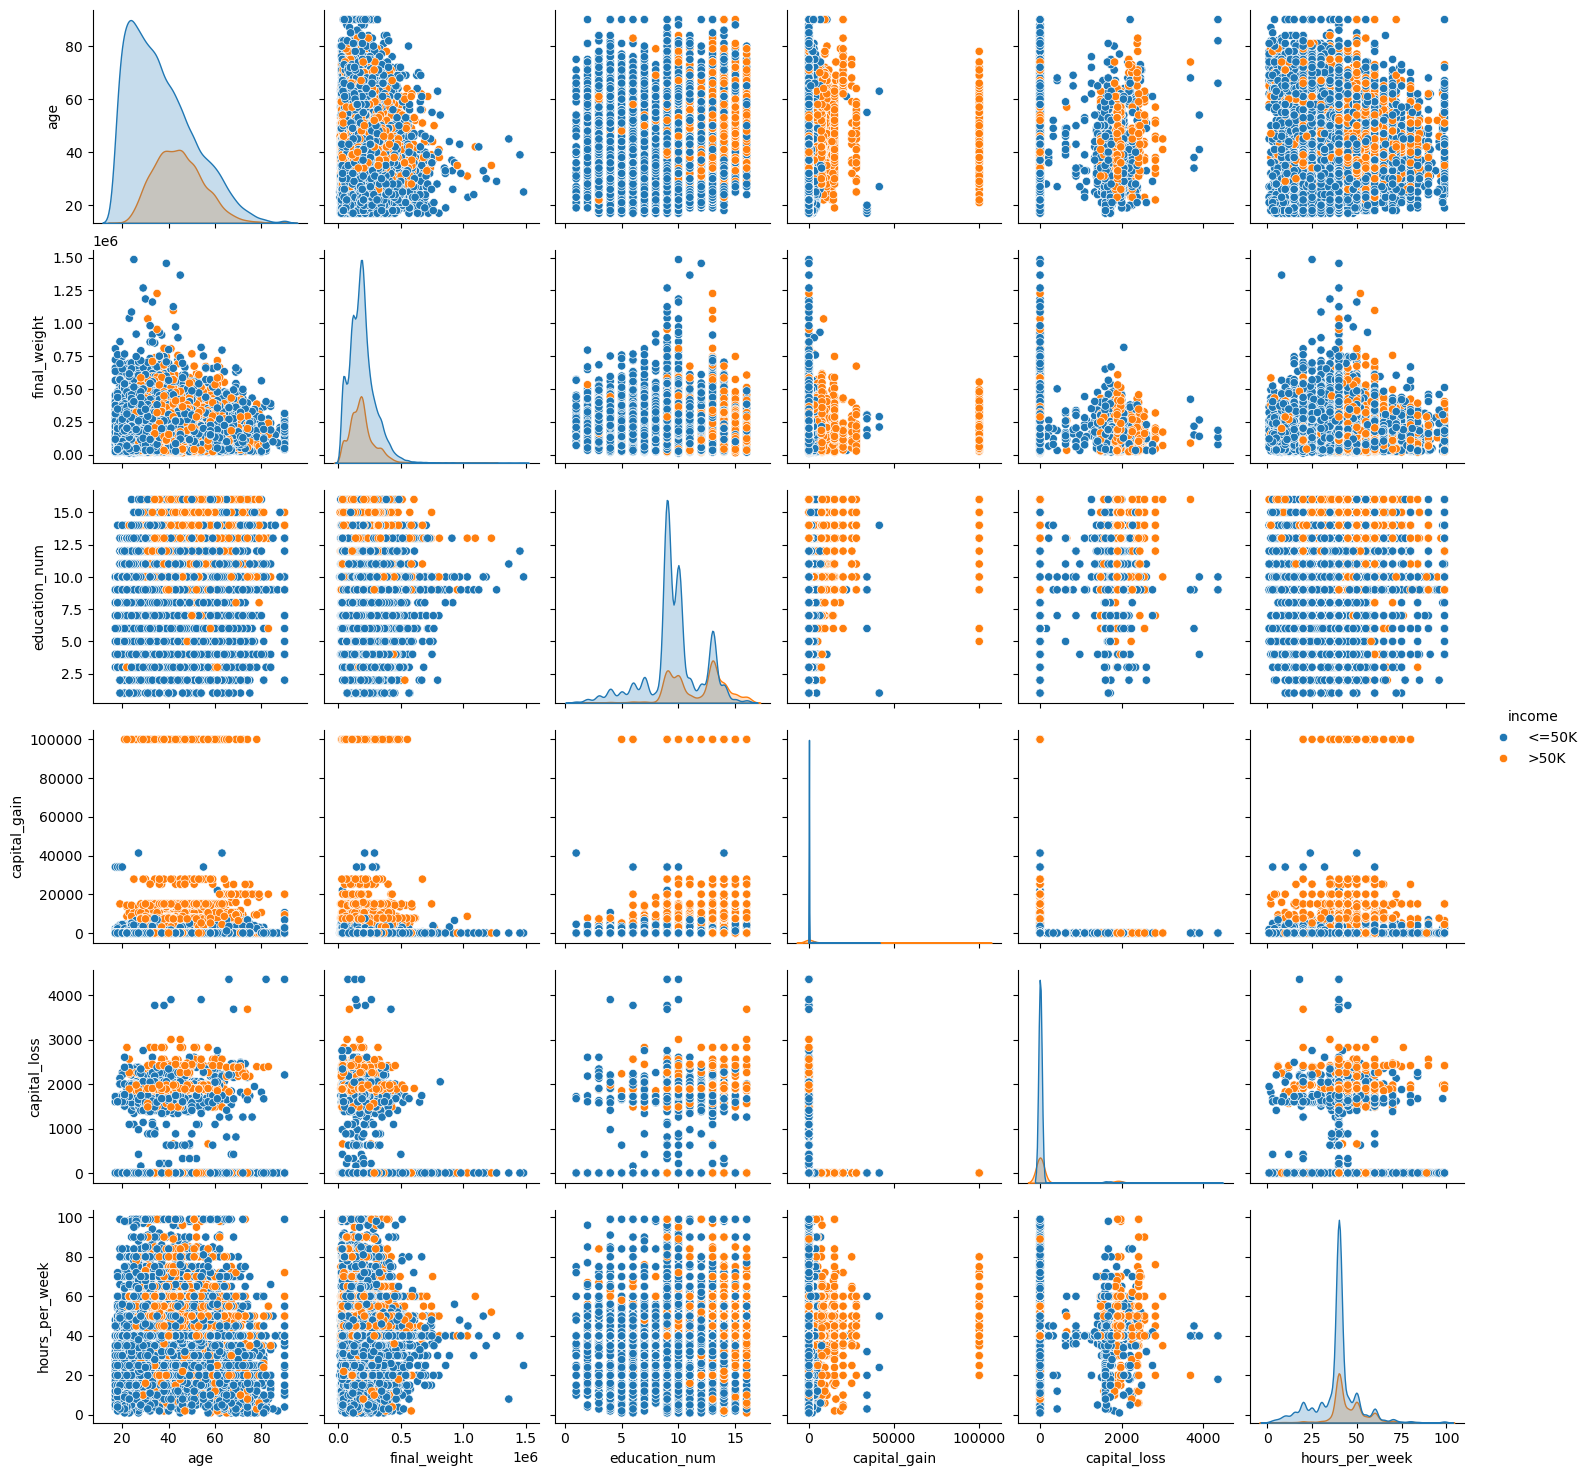

In [27]:
sns.pairplot(data=df,hue="income")
plt.show()

In [28]:
X = df.drop("income",axis=1)
y = df["income"]

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [30]:
cat_cols = [col for col in X_train.columns if X_train[col].dtype == "O"]

X_train[cat_cols].isnull().sum()

work_class        1276
education            0
marital_status       0
occupation        1278
relationship         0
race                 0
sex                  0
native_country     414
dtype: int64

In [31]:
X_test[cat_cols].isnull().sum()

work_class        560
education           0
marital_status      0
occupation        565
relationship        0
race                0
sex                 0
native_country    169
dtype: int64

In [32]:
for i in [X_train,X_test]:
    i["work_class"] = i["work_class"].fillna(value=X_train["work_class"].mode()[0])
    i["occupation"] = i["occupation"].fillna(value=X_train["occupation"].mode()[0])
    i["native_country"] = i["native_country"].fillna(value=X_train["native_country"].mode()[0])

In [33]:
print(X_train[cat_cols].isnull().sum(),"\n")
print(X_test[cat_cols].isnull().sum())

work_class        0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
dtype: int64 

work_class        0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
dtype: int64


In [34]:
X_train[cat_cols].nunique()

work_class         8
education         16
marital_status     7
occupation        14
relationship       6
race               5
sex                2
native_country    41
dtype: int64

In [35]:
df["native_country"].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', nan, 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [36]:
y_train_binary = y_train.apply(lambda x: 1 if x.strip() == ">50K" else 0)

In [37]:
y_train_binary

32098    1
25206    0
23491    1
12367    0
7054     0
        ..
13123    1
19648    0
9845     0
10799    1
2732     0
Name: income, Length: 22792, dtype: int64

In [38]:
means = y_train_binary.groupby(X_train["native_country"]).mean()

In [42]:
X_train["native_country_encoded"] = X_train["native_country"].map(means)
X_train["native_country_encoded"] = X_train["native_country_encoded"].fillna(value=y_train_binary.mean())

X_test["native_country_encoded"] = X_test["native_country_encoded"].map(means)
X_test["native_country_encoded"] = X_test["native_country_encoded"].fillna(value=y_train_binary.mean())

In [43]:
X_train.head()

,age,work_class,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,native_country_encoded
32098,45,Private,170871,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,7298,0,60,United-States,0.245722
25206,47,State-gov,108890,HS-grad,9,Divorced,Adm-clerical,Unmarried,White,Female,1831,0,38,United-States,0.245722
23491,48,Private,187505,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,United-States,0.245722
12367,29,Private,145592,HS-grad,9,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Guatemala,0.041667
7054,23,Private,203003,7th-8th,4,Never-married,Craft-repair,Not-in-family,White,Male,0,0,25,Germany,0.284091


In [44]:
X_train = X_train.drop("native_country", axis=1)
X_test = X_test.drop("native_country", axis=1)

In [45]:
cat_cols

['work_class',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [47]:
one_hot_cats = [col for col in cat_cols if col != "native_country"]

In [48]:
one_hot_cats

['work_class',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex']

In [49]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [52]:
encoder = ColumnTransformer(
    transformers=[
        ("transformer",OneHotEncoder(handle_unknown="ignore",sparse_output=False),one_hot_cats)
    ], remainder="passthrough"
)

In [53]:
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

In [54]:
X_train_encoded

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
        60.        ,  0.24572168],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        38.        ,  0.24572168],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        50.        ,  0.24572168],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        40.        ,  0.24572168],
       [ 0.        ,  1.        ,  0.        , ...,  0.        ,
        45.        ,  0.24572168],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        48.        ,  0.24572168]])

In [55]:
columns_encoded = encoder.get_feature_names_out()
columns_encoded

array(['transformer__work_class_Federal-gov',
       'transformer__work_class_Local-gov',
       'transformer__work_class_Never-worked',
       'transformer__work_class_Private',
       'transformer__work_class_Self-emp-inc',
       'transformer__work_class_Self-emp-not-inc',
       'transformer__work_class_State-gov',
       'transformer__work_class_Without-pay',
       'transformer__education_10th', 'transformer__education_11th',
       'transformer__education_12th', 'transformer__education_1st-4th',
       'transformer__education_5th-6th', 'transformer__education_7th-8th',
       'transformer__education_9th', 'transformer__education_Assoc-acdm',
       'transformer__education_Assoc-voc',
       'transformer__education_Bachelors',
       'transformer__education_Doctorate',
       'transformer__education_HS-grad', 'transformer__education_Masters',
       'transformer__education_Preschool',
       'transformer__education_Prof-school',
       'transformer__education_Some-college',
     

In [56]:
X_train = pd.DataFrame(data=X_train_encoded,columns=columns_encoded,index=X_train.index)
X_test = pd.DataFrame(data=X_test_encoded,columns=columns_encoded,index=X_test.index)

In [57]:
X_train

,transformer__work_class_Federal-gov,transformer__work_class_Local-gov,transformer__work_class_Never-worked,transformer__work_class_Private,transformer__work_class_Self-emp-inc,transformer__work_class_Self-emp-not-inc,transformer__work_class_State-gov,transformer__work_class_Without-pay,transformer__education_10th,transformer__education_11th,...,transformer__race_White,transformer__sex_Female,transformer__sex_Male,remainder__age,remainder__final_weight,remainder__education_num,remainder__capital_gain,remainder__capital_loss,remainder__hours_per_week,remainder__native_country_encoded
32098,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,45.0,170871.0,9.0,7298.0,0.0,60.0,0.245722
25206,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,47.0,108890.0,9.0,1831.0,0.0,38.0,0.245722
23491,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,48.0,187505.0,10.0,0.0,0.0,50.0,0.245722
12367,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,29.0,145592.0,9.0,0.0,0.0,40.0,0.041667
7054,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,23.0,203003.0,4.0,0.0,0.0,25.0,0.284091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,43.0,33331.0,14.0,0.0,0.0,40.0,0.245722
19648,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,44.0,98466.0,6.0,0.0,0.0,35.0,0.245722
9845,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,23.0,45317.0,10.0,0.0,0.0,40.0,0.245722
10799,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,45.0,215862.0,16.0,7688.0,0.0,45.0,0.245722


In [58]:
X_test

,transformer__work_class_Federal-gov,transformer__work_class_Local-gov,transformer__work_class_Never-worked,transformer__work_class_Private,transformer__work_class_Self-emp-inc,transformer__work_class_Self-emp-not-inc,transformer__work_class_State-gov,transformer__work_class_Without-pay,transformer__education_10th,transformer__education_11th,...,transformer__race_White,transformer__sex_Female,transformer__sex_Male,remainder__age,remainder__final_weight,remainder__education_num,remainder__capital_gain,remainder__capital_loss,remainder__hours_per_week,remainder__native_country_encoded
22278,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,27.0,177119.0,10.0,0.0,0.0,44.0,0.240391
8950,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,27.0,216481.0,13.0,0.0,0.0,40.0,0.240391
7838,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,25.0,256263.0,12.0,0.0,0.0,40.0,0.240391
16505,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,46.0,147640.0,3.0,0.0,1902.0,40.0,0.240391
19140,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,45.0,172822.0,7.0,0.0,2824.0,76.0,0.240391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21949,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,46.0,192963.0,13.0,0.0,2415.0,35.0,0.240391
26405,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,64.0,388594.0,15.0,15024.0,0.0,45.0,0.240391
23236,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,54.0,304570.0,13.0,7688.0,0.0,40.0,0.240391
26823,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,36.0,90159.0,10.0,0.0,0.0,40.0,0.240391


In [59]:
cols = X_train.columns

In [60]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

In [61]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [62]:
X_train

array([[ 0. ,  0. ,  0. , ...,  0. ,  4. ,  0. ],
       [ 0. ,  0. ,  0. , ...,  0. , -0.4,  0. ],
       [ 0. ,  0. ,  0. , ...,  0. ,  2. ,  0. ],
       ...,
       [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 0. ,  1. ,  0. , ...,  0. ,  1. ,  0. ],
       [ 0. ,  0. ,  0. , ...,  0. ,  1.6,  0. ]])

In [63]:
X_train = pd.DataFrame(data=X_train,columns=cols)

In [64]:
X_train

,transformer__work_class_Federal-gov,transformer__work_class_Local-gov,transformer__work_class_Never-worked,transformer__work_class_Private,transformer__work_class_Self-emp-inc,transformer__work_class_Self-emp-not-inc,transformer__work_class_State-gov,transformer__work_class_Without-pay,transformer__education_10th,transformer__education_11th,...,transformer__race_White,transformer__sex_Female,transformer__sex_Male,remainder__age,remainder__final_weight,remainder__education_num,remainder__capital_gain,remainder__capital_loss,remainder__hours_per_week,remainder__native_country_encoded
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.40,-0.058906,-0.333333,7298.0,0.0,4.0,0.000000
1,0.0,0.0,0.0,-1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,-1.0,0.50,-0.578076,-0.333333,1831.0,0.0,-0.4,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.55,0.080425,0.000000,0.0,0.0,2.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.40,-0.270650,-0.333333,0.0,0.0,0.0,-0.204055
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.70,0.210240,-2.000000,0.0,0.0,-3.0,0.038369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22787,0.0,1.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.30,-1.210980,1.333333,0.0,0.0,0.0,0.000000
22788,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.35,-0.665391,-1.333333,0.0,0.0,-1.0,0.000000
22789,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,-1.0,-0.70,-1.110582,0.000000,0.0,0.0,0.0,0.000000
22790,0.0,1.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.40,0.317951,2.000000,7688.0,0.0,1.0,0.000000


In [65]:
X_test = pd.DataFrame(data=X_test,columns=cols)

In [66]:
X_test

,transformer__work_class_Federal-gov,transformer__work_class_Local-gov,transformer__work_class_Never-worked,transformer__work_class_Private,transformer__work_class_Self-emp-inc,transformer__work_class_Self-emp-not-inc,transformer__work_class_State-gov,transformer__work_class_Without-pay,transformer__education_10th,transformer__education_11th,...,transformer__race_White,transformer__sex_Female,transformer__sex_Male,remainder__age,remainder__final_weight,remainder__education_num,remainder__capital_gain,remainder__capital_loss,remainder__hours_per_week,remainder__native_country_encoded
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,-1.0,-0.50,-0.006571,0.000000,0.0,0.0,0.8,-0.00533
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,-1.0,-0.50,0.323136,1.000000,0.0,0.0,0.0,-0.00533
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.60,0.656361,0.666667,0.0,0.0,0.0,-0.00533
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,0.0,0.0,0.45,-0.253496,-2.333333,0.0,1902.0,0.0,-0.00533
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.40,-0.042564,-1.000000,0.0,2824.0,7.2,-0.00533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9764,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,0.0,0.0,0.45,0.126143,1.000000,0.0,2415.0,-1.0,-0.00533
9765,1.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.35,1.764802,1.666667,15024.0,0.0,1.0,-0.00533
9766,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,0.0,0.0,0.85,1.060994,1.000000,7688.0,0.0,0.0,-0.00533
9767,0.0,0.0,0.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,-1.0,-0.05,-0.734972,0.000000,0.0,0.0,0.0,-0.00533


In [67]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
rfc = RandomForestClassifier(n_estimators=100, random_state=15)
rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=15)

In [73]:
y_pred = rfc.predict(X_test)

In [74]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.91      7407
        >50K       0.75      0.61      0.67      2362

    accuracy                           0.86      9769
   macro avg       0.82      0.77      0.79      9769
weighted avg       0.85      0.86      0.85      9769

[[6925  482]
 [ 916 1446]]


In [75]:
from sklearn.model_selection import RandomizedSearchCV
rfc = RandomForestClassifier()

params = {
    "n_estimators": [100,200,500,1000],
    "max_depth": [5,10,15,None],
    "max_features": ["sqrt","log2",5,7,9],
    "min_samples_split": [2,8,15,20]
}

In [76]:
rscv = RandomizedSearchCV(estimator=rfc,param_distributions=params,cv=5,n_jobs=-1)
rscv.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, None],
                                        'max_features': ['sqrt', 'log2', 5, 7,
                                                         9],
                                        'min_samples_split': [2, 8, 15, 20],
                                        'n_estimators': [100, 200, 500, 1000]})

In [77]:
y_pred = rscv.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

       <=50K       0.88      0.94      0.91      7407
        >50K       0.77      0.61      0.68      2362

    accuracy                           0.86      9769
   macro avg       0.83      0.78      0.80      9769
weighted avg       0.86      0.86      0.86      9769

[[6978  429]
 [ 923 1439]]


In [78]:
rscv.best_params_

{'n_estimators': 100,
 'min_samples_split': 15,
 'max_features': 5,
 'max_depth': None}